<a href="https://colab.research.google.com/github/drshahizan/special-topic-data-engineering/blob/main/project/submission/DataAce/datacleaning_tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/db_tiktok.tiktokdatacollectionlatest.csv'

In [ ]:
df = pd.read_csv(filename)
df.head()

,Username,Caption,Video Duration,Upload Date,Comments,Plays,Shares,Likes
0,ceddyornot,Was invited to Natura’s event to learn more ab...,63,1685624469,9,6441,1,158
1,ceddyornot,So which one do you like? Zus’ Buttercrème lat...,55,1685596800,136,52400,59,2373
2,ceddyornot,We meet again for the 3rd episode of MILO GAME...,338,1685538632,26,81200,26,1441
3,ceddyornot,The Loaf [Muslim Friendly] just opened its fir...,91,1685445610,31,62800,50,1212
4,ceddyornot,[Yet another Hokkien content since I am back i...,58,1685190149,109,92500,315,3775


In [ ]:
df.info

<bound method DataFrame.info of         Username                                            Caption  \
0     ceddyornot  Was invited to Natura’s event to learn more ab...   
1     ceddyornot  So which one do you like? Zus’ Buttercrème lat...   
2     ceddyornot  We meet again for the 3rd episode of MILO GAME...   
3     ceddyornot  The Loaf [Muslim Friendly] just opened its fir...   
4     ceddyornot  [Yet another Hokkien content since I am back i...   
...          ...                                                ...   
1011      teroqa  📍Famous Mee Goreng Bangkok Lane(USJ 2)830am-73...   
1012      teroqa  📍Asap Steamboat & Grill (94 Jalan Tempinis Kg ...   
1013      teroqa  📍As Port Klang Yong Tau Foo(pasar malam)Isnin ...   
1014      teroqa  📍Saltys(The H Hartamas) 1130am-12midnight #mak...   
1015      teroqa  📍Kiosk Donut Kotak Gombak(waze) 11am-7pm(AHAD ...   

      Video Duration  Upload Date  Comments    Plays  Shares  Likes  
0                 63   1685624469         9  

In [ ]:
df.shape

(1016, 8)

In [ ]:
df.isnull().sum()

Username          0
Caption           0
Video Duration    0
Upload Date       0
Comments          0
Plays             0
Shares            0
Likes             0
dtype: int64

In [ ]:
df.isna().sum()

Username          0
Caption           0
Video Duration    0
Upload Date       0
Comments          0
Plays             0
Shares            0
Likes             0
dtype: int64

In [ ]:
dfclean = df.drop_duplicates()
dfclean.head()

,Username,Caption,Video Duration,Upload Date,Comments,Plays,Shares,Likes
0,ceddyornot,Was invited to Natura’s event to learn more ab...,63,1685624469,9,6441,1,158
1,ceddyornot,So which one do you like? Zus’ Buttercrème lat...,55,1685596800,136,52400,59,2373
2,ceddyornot,We meet again for the 3rd episode of MILO GAME...,338,1685538632,26,81200,26,1441
3,ceddyornot,The Loaf [Muslim Friendly] just opened its fir...,91,1685445610,31,62800,50,1212
4,ceddyornot,[Yet another Hokkien content since I am back i...,58,1685190149,109,92500,315,3775


In [ ]:
dfclean.shape

(659, 8)

In [ ]:
dfclean = dfclean.dropna()

In [ ]:
dfclean.shape

(659, 8)

In [ ]:
dfclean.describe()

,Video Duration,Upload Date,Comments,Plays,Shares,Likes
count,659.000000,6.590000e+02,659.000000,6.590000e+02,659.000000,659.000000
mean,68.033384,1.678164e+09,431.845220,5.996691e+05,1485.523520,30722.963581
std,54.372285,2.059873e+07,1434.757938,1.969748e+06,5941.335993,89809.973082
min,5.000000,1.581866e+09,0.000000,5.970000e+02,0.000000,32.000000
25%,34.500000,1.680770e+09,12.000000,1.915000e+04,17.000000,705.500000
50%,59.000000,1.684554e+09,49.000000,7.490000e+04,80.000000,2704.000000
75%,83.000000,1.686029e+09,181.000000,3.250500e+05,502.500000,17250.000000
max,533.000000,1.686898e+09,17000.000000,2.860000e+07,70700.000000,984300.000000


In [ ]:
import regex as re

In [ ]:
dfclean['hashtags'] = dfclean['Caption'].apply(lambda x: re.findall(r'#(\w+)', x))
dfclean['Caption'] = dfclean['Caption'].apply(lambda x: re.sub(r'#(\w+)', '', x))

# Display the modified DataFrame
print(dfclean)

        Username                                            Caption  \
0     ceddyornot  Was invited to Natura’s event to learn more ab...   
1     ceddyornot  So which one do you like? Zus’ Buttercrème lat...   
2     ceddyornot  We meet again for the 3rd episode of MILO GAME...   
3     ceddyornot  The Loaf [Muslim Friendly] just opened its fir...   
4     ceddyornot  [Yet another Hokkien content since I am back i...   
...          ...                                                ...   
1011      teroqa  📍Famous Mee Goreng Bangkok Lane(USJ 2)830am-73...   
1012      teroqa  📍Asap Steamboat & Grill (94 Jalan Tempinis Kg ...   
1013      teroqa  📍As Port Klang Yong Tau Foo(pasar malam)Isnin ...   
1014      teroqa         📍Saltys(The H Hartamas) 1130am-12midnight    
1015      teroqa  📍Kiosk Donut Kotak Gombak(waze) 11am-7pm(AHAD ...   

      Video Duration  Upload Date  Comments    Plays  Shares  Likes  \
0                 63   1685624469         9     6441       1    158   
1    

In [ ]:
dfclean

,Username,Caption,Video Duration,Upload Date,Comments,Plays,Shares,Likes,hashtags
0,ceddyornot,Was invited to Natura’s event to learn more ab...,63,1685624469,9,6441,1,158,[]
1,ceddyornot,So which one do you like? Zus’ Buttercrème lat...,55,1685596800,136,52400,59,2373,[]
2,ceddyornot,We meet again for the 3rd episode of MILO GAME...,338,1685538632,26,81200,26,1441,"[JomMinumMILO, MILOGameshow, EdisiRaya]"
3,ceddyornot,The Loaf [Muslim Friendly] just opened its fir...,91,1685445610,31,62800,50,1212,[MakanLokal]
4,ceddyornot,[Yet another Hokkien content since I am back i...,58,1685190149,109,92500,315,3775,[]
...,...,...,...,...,...,...,...,...,...
1011,teroqa,📍Famous Mee Goreng Bangkok Lane(USJ 2)830am-73...,59,1656412529,19,35800,163,1744,[makanlokal]
1012,teroqa,📍Asap Steamboat & Grill (94 Jalan Tempinis Kg ...,87,1655887261,35,51200,753,1374,[]
1013,teroqa,📍As Port Klang Yong Tau Foo(pasar malam)Isnin ...,51,1655803743,70,164100,297,5490,[makanlokal]
1014,teroqa,📍Saltys(The H Hartamas) 1130am-12midnight,81,1655359162,13,38600,45,1433,[makanlokal]


In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile("[\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\U0001F910-\U0001F9FF\u2600-\u26FF\u2700-\u27BF]+", flags=re.UNICODE)
    return emoji_pattern.sub('', text)

# Remove emojis from the 'Caption' column
dfclean['Caption'] = dfclean['Caption'].apply(lambda x: remove_emojis(x))

# Display the modified DataFrame
print(dfclean)

        Username                                            Caption  \
0     ceddyornot  Was invited to Natura’s event to learn more ab...   
1     ceddyornot  So which one do you like? Zus’ Buttercrème lat...   
2     ceddyornot  We meet again for the 3rd episode of MILO GAME...   
3     ceddyornot  The Loaf [Muslim Friendly] just opened its fir...   
4     ceddyornot  [Yet another Hokkien content since I am back i...   
...          ...                                                ...   
1011      teroqa  Famous Mee Goreng Bangkok Lane(USJ 2)830am-730...   
1012      teroqa  Asap Steamboat & Grill (94 Jalan Tempinis Kg T...   
1013      teroqa  As Port Klang Yong Tau Foo(pasar malam)Isnin -...   
1014      teroqa          Saltys(The H Hartamas) 1130am-12midnight    
1015      teroqa  Kiosk Donut Kotak Gombak(waze) 11am-7pm(AHAD C...   

      Video Duration  Upload Date  Comments    Plays  Shares  Likes  \
0                 63   1685624469         9     6441       1    158   
1    

In [ ]:
import datetime

In [ ]:
dfclean['Upload Date'] = pd.to_datetime(dfclean['Upload Date'], unit='s')

# Display the modified DataFrame
print(dfclean)

        Username                                            Caption  \
0     ceddyornot  Was invited to Natura’s event to learn more ab...   
1     ceddyornot  So which one do you like? Zus’ Buttercrème lat...   
2     ceddyornot  We meet again for the 3rd episode of MILO GAME...   
3     ceddyornot  The Loaf [Muslim Friendly] just opened its fir...   
4     ceddyornot  [Yet another Hokkien content since I am back i...   
...          ...                                                ...   
1011      teroqa  Famous Mee Goreng Bangkok Lane(USJ 2)830am-730...   
1012      teroqa  Asap Steamboat & Grill (94 Jalan Tempinis Kg T...   
1013      teroqa  As Port Klang Yong Tau Foo(pasar malam)Isnin -...   
1014      teroqa          Saltys(The H Hartamas) 1130am-12midnight    
1015      teroqa  Kiosk Donut Kotak Gombak(waze) 11am-7pm(AHAD C...   

      Video Duration         Upload Date  Comments    Plays  Shares  Likes  \
0                 63 2023-06-01 13:01:09         9     6441       1  

In [ ]:
dfclean['Likes'] = dfclean['Likes'].astype(int)

# Display the modified DataFrame
print(dfclean)

        Username                                            Caption  \
0     ceddyornot  Was invited to Natura’s event to learn more ab...   
1     ceddyornot  So which one do you like? Zus’ Buttercrème lat...   
2     ceddyornot  We meet again for the 3rd episode of MILO GAME...   
3     ceddyornot  The Loaf [Muslim Friendly] just opened its fir...   
4     ceddyornot  [Yet another Hokkien content since I am back i...   
...          ...                                                ...   
1011      teroqa  Famous Mee Goreng Bangkok Lane(USJ 2)830am-730...   
1012      teroqa  Asap Steamboat & Grill (94 Jalan Tempinis Kg T...   
1013      teroqa  As Port Klang Yong Tau Foo(pasar malam)Isnin -...   
1014      teroqa          Saltys(The H Hartamas) 1130am-12midnight    
1015      teroqa  Kiosk Donut Kotak Gombak(waze) 11am-7pm(AHAD C...   

      Video Duration         Upload Date  Comments    Plays  Shares  Likes  \
0                 63 2023-06-01 13:01:09         9     6441       1  

In [ ]:
dfclean.isna().sum()

Username          0
Caption           0
Video Duration    0
Upload Date       0
Comments          0
Plays             0
Shares            0
Likes             0
hashtags          0
dtype: int64

In [ ]:
# Remove non-ASCII and non-alphanumeric characters from 'Caption' column
dfclean['Caption'] = df['Caption'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Display the modified DataFrame
print(dfclean)

        Username                                            Caption  \
0     ceddyornot  Was invited to Naturas event to learn more abo...   
1     ceddyornot  So which one do you like Zus Buttercrme latte ...   
2     ceddyornot  We meet again for the 3rd episode of MILO GAME...   
3     ceddyornot  The Loaf Muslim Friendly just opened its first...   
4     ceddyornot  Yet another Hokkien content since I am back in...   
...          ...                                                ...   
1011      teroqa  Famous Mee Goreng Bangkok LaneUSJ 2830am730pm ...   
1012      teroqa  Asap Steamboat  Grill 94 Jalan Tempinis Kg Ten...   
1013      teroqa  As Port Klang Yong Tau Foopasar malamIsnin  Pu...   
1014      teroqa   SaltysThe H Hartamas 1130am12midnight makanlokal   
1015      teroqa  Kiosk Donut Kotak Gombakwaze 11am7pmAHAD CUTI ...   

      Video Duration         Upload Date  Comments    Plays  Shares  Likes  \
0                 63 2023-06-01 13:01:09         9     6441       1  

In [ ]:
dfclean.shape


(659, 9)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

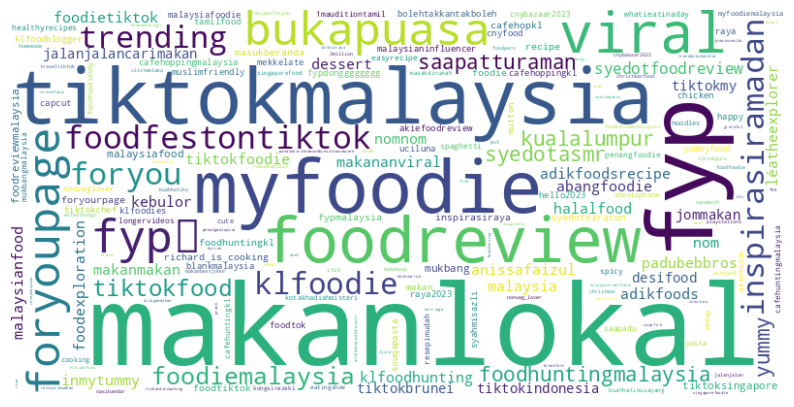

In [ ]:
# Convert hashtags to lowercase
dfclean['hashtags'] = dfclean['hashtags'].apply(lambda x: [tag.lower() for tag in x])

# Combine all hashtags into a single list
all_hashtags = [word for sublist in dfclean['hashtags'] for word in sublist]

# Count the frequency of each hashtag
hashtags_frequency = Counter(all_hashtags)

# Create a WordCloud object with the frequency of hashtags as input
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud with font sizes based on frequencies
wordcloud.generate_from_frequencies(hashtags_frequency)

# Set the font size range based on the frequencies
min_freq = min(hashtags_frequency.values())
max_freq = max(hashtags_frequency.values())
wordcloud.recolor(random_state=42)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
dfclean.to_csv('tiktok-final.csv', index=False)

In [ ]:
from google.colab import files
files.download('tiktok-final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>